(lecture15:example-linear-regression)=
# Example: Linear regression with a single variable


## An example where things work as expected

Let's create a synthetic dataset to introduce the basic concepts.
It has to be synthetic because we want to know what the ground truth is.
Let's start with pairs of $x$ and $y$ which definitely have a linear relationship, albeit $y$ may be contaminated with Gaussian noise.
In particular, we generate the data from:

$$
y_i = -0.5 + 2 x_i + 0.1\epsilon_i,
$$

where $\epsilon_i \sim N(0,1)$ and where we sample $x_i \sim U([0,1])$.
Here is how to generate this synthetic dataset and how it looks like.

In [15]:
MAKE_BOOK_FIGURES=False

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

def set_book_style():
    plt.style.use('seaborn-v0_8-white') 
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings
        'font.family': 'serif',  # For academic publishing
        'font.size': 8,  # As requested, 10pt font
        'axes.labelsize': 8,
        'axes.titlesize': 8,
        'xtick.labelsize': 7,  # Slightly smaller for better readability
        'ytick.labelsize': 7,
        'legend.fontsize': 7,
        
        # Line and marker settings for consistency
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,
        
        # Layout to prevent clipped labels
        'figure.constrained_layout.use': True,
        
        # Default DPI (will override when saving)
        'figure.dpi': 600,
        'savefig.dpi': 600,
        
        # Despine - remove top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,
        
        # Remove legend frame
        'legend.frameon': False,
        
        # Additional trim settings
        'figure.autolayout': True,  # Alternative to constrained_layout
        'savefig.bbox': 'tight',    # Trim when saving
        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off
    })

def save_for_book(fig, filename, is_vector=True, **kwargs):
    """
    Save a figure with book-optimized settings.
    
    Parameters:
    -----------
    fig : matplotlib figure
        The figure to save
    filename : str
        Filename without extension
    is_vector : bool
        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.
    **kwargs : dict
        Additional kwargs to pass to savefig
    """    
    # Set appropriate DPI and format based on figure type
    if is_vector:
        dpi = 1000
        ext = '.pdf'
    else:
        dpi = 600
        ext = '.tif'
    
    # Save the figure with book settings
    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)


def make_full_width_fig():
    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)

def make_half_width_fig():
    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)

if MAKE_BOOK_FIGURES:
    set_book_style()
make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()
make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

import numpy as np
import scipy.stats as st

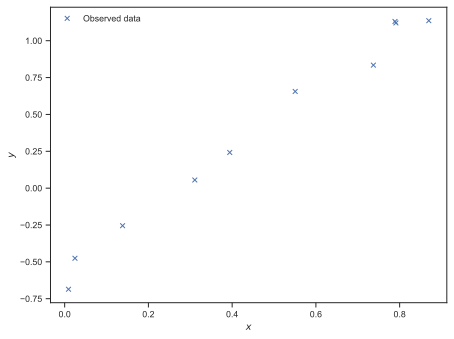

In [16]:
num_obs = 10
x = np.random.rand(num_obs)
w0_true = -0.5
w1_true = 2.0
sigma_true = 0.1
y = w0_true + w1_true * x + sigma_true * np.random.randn(num_obs)
# Let's plot the data
fig, ax = make_full_width_fig()
ax.plot(x, y, 'x', label='Observed data')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best')
save_for_book(fig, 'ch15.fig1')

We will now use least squares to fit the data to this linear model:

$$
y = w_0 + w_1 x.
$$

As we discussed in the previous section, least squares minimize the square loss:

$$
L(\mathbf{w}) = \sum_{i=1}^N(y_i - w_0 - w_1 x_i)^2 = \parallel \mathbf{y} - \mathbf{X}\mathbf{w}\parallel^2,
$$

where $\mathbf{y} = (y_1,\dots,y_N)$ is the vector of observations, $\mathbf{w} = (w_0, w_1)$ is the weight vector, and the $N\times 2$ *design matrix* $\mathbf{X}$ is:

$$
\mathbf{X} = 
\begin{bmatrix} 
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N
\end{bmatrix}.
$$

We definitely need to make the design matrix $\mathbf{X}$:

In [17]:
# Put together a column of ones next to the observed x's
X = np.hstack([np.ones((num_obs, 1)), x.reshape((num_obs, 1))])
X

array([[1.        , 0.86961817],
       [1.        , 0.55053567],
       [1.        , 0.00918354],
       [1.        , 0.79105222],
       [1.        , 0.39423501],
       [1.        , 0.7888846 ],
       [1.        , 0.73728586],
       [1.        , 0.13833468],
       [1.        , 0.31077902],
       [1.        , 0.02458512]])

Once we have this, we can use [numpy.linalg.lstsq](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html?highlight=lstsq#numpy.linalg.lstsq) to solve the least squares problem. 
This function solves in a smart way the linear system we derived in the previous section, i.e.,

$$
\mathbf{X}^T\mathbf{X}\mathbf{w} = \mathbf{X}^T\mathbf{y}.
$$

It works as follows:

In [18]:
w, _, _, _ = np.linalg.lstsq(X, y, rcond=None)
print(f'w_0 = {w[0]:1.2f}')
print(f'w_1 = {w[1]:1.2f}')

w_0 = -0.58
w_1 = 2.08


So, you see that the values we found for $w_0$ and $w_1$ are close to the correct values, but not exactly the same.
That is fine. There is noise in the data and we have only used ten observations.
The more noise there is, the more observations it would take to identify the regression coefficients correctly.

Let's now plot the regression function against the data:

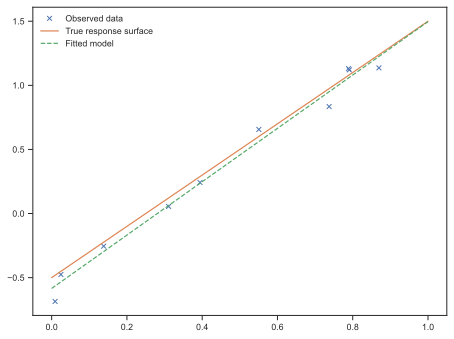

In [19]:
fig, ax = make_full_width_fig()
# Some points on which to evaluate the regression function
xx = np.linspace(0, 1, 100)
# The true connection between x and y
yy_true = w0_true + w1_true * xx
# The model we just fitted
yy = w[0] + w[1] * xx
# plot the data again
ax.plot(x, y, 'x', label='Observed data')
# overlay the true 
ax.plot(xx, yy_true, label='True response surface')
# overlay our prediction
ax.plot(xx, yy, '--', label='Fitted model')
plt.legend(loc='best')
save_for_book(fig, 'ch15.fig2')

## Questions

+ Try increasing ``num_obs`` to 100. Does the fit improve? Conclusion: When you training with least squares, the more data you have the better.
+ Try decreasing ``num_obs`` to 2. What is happening here? This is an example of fitting the noise.

## An example where things do not work as expected: underfitting

Let's try to fit a linear regression model to data generated from:

$$
y_i = -0.5 + 2x_i + 2x_i^2 + \epsilon_i,
$$

where $\epsilon_i \sim N(0, 1)$ and where we sample $x_i \sim U([-1,1])$:

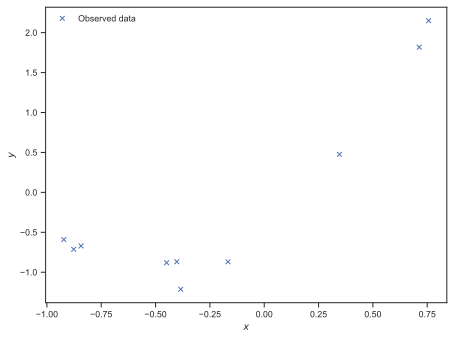

In [20]:
# How many observations we have
num_obs = 10
x = -1.0 + 2 * np.random.rand(num_obs)
w0_true = -0.5
w1_true = 2.0
w2_true = 2.0
sigma_true = 0.1
y = w0_true + w1_true * x + w2_true * x ** 2 + sigma_true * np.random.randn(num_obs)
# Let's plot the data
fig, ax = make_full_width_fig()
ax.plot(x, y, 'x', label='Observed data')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best')

We will still try to fit a linear model to this dataset. We know that it is not going to work well, but let's try it anyway.
First, create the design matrix just like before:

In [21]:
X = np.hstack([np.ones((num_obs, 1)), x.reshape((num_obs, 1))])
w, _, _, _ = np.linalg.lstsq(X, y, rcond=None)
print(f'w_0 = {w[0]:1.2f}')
print(f'w_1 = {w[1]:1.2f}')

w_0 = 0.23
w_1 = 1.64


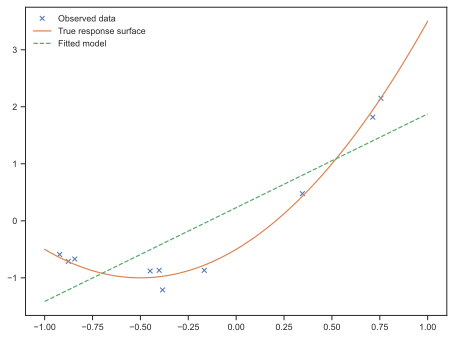

In [22]:
fig, ax = make_full_width_fig()
# Some points on which to evaluate the regression function
xx = np.linspace(-1, 1, 100)
# The true connection between x and y
yy_true = w0_true + w1_true * xx + w2_true * xx ** 2
# The model we just fitted
yy = w[0] + w[1] * xx
# plot the data again
ax.plot(x, y, 'x', label='Observed data')
# overlay the true 
ax.plot(xx, yy_true, label='True response surface')
# overlay our prediction
ax.plot(xx, yy, '--', label='Fitted model')
plt.legend(loc='best')
save_for_book(fig, 'ch15.fig3')

Notice that the model is too simple to fit the data.
This is an example of *underfitting*.
How can we fix this?

## Questions

+ Experiment with very small ``num_obs``. If you did not know what the true response surface was, would you be able to say whether or not the fit is good?

+ Experiment with a big ``num_obs``. Does the fit improve? This is an example of *underfitting*. Your model does not have enough expressivity to capture the data.